<h1 style="background-color: #FAF9F6; color: #11557C; text-align: left; font-family: 'Arial', sans-serif; padding: 20px; border-bottom: 1px solid #11557C;">
    SQL com Jupyter Notebook  
</h1>

#### Bibliotecas Utilizadas

 - pandas 
 - ipython-sql

#### Preparando o Banco de Dados

In [2]:
# Preparando o Banco de Dados

import pandas as pd
import sqlite3 
import os


# --- Criação dos DataFrames ---
# DataFrame de Clientes
data_clientes = {
    'ID_Cliente': [1, 2, 3, 4, 5, 6],
    'Nome': ['Luiz', 'Graziela', 'Ricardo', 'Mariana', 'Leonardo', 'Beatriz'],
    'Idade': [30, 28, 35, 28, 40, 16],
    'Cidade': ['São Paulo', 'Rio de Janeiro', 'Salvador', 'São Paulo', 'Recife', 'São Paulo']
}

# DataFrame de Pedidos
data_pedidos = {
    'ID_Pedido': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'ID_Cliente': [1, 3, 2, 5, 4, 1, 2, 3, 6, 1],
    'Produto': ['Camisa', 'Calça', 'Vestido', 'Sapato', 'Blusa', 'Camisa', 'Calça', 'Vestido', 'Sapato', 'Blusa'],
    'Quantidade': [2, 1, 3, 2, 1, 2, 1, 3, 2, 1],
    'Preco': [30.00, 35.00, 42.00, 15.50, 9.90, 80.00, 12.99, 30.00, 45.25, 5.00]
}

# Criando o DataFrame de Clientes
clientes_df = pd.DataFrame(data_clientes)


# Criando o DataFrame de Pedidos
pedidos_df = pd.DataFrame(data_pedidos, index=None)


# criando a conexão
if os.path.exists('bancodados.db'):   
    print("Banco de Dados 'bancodados.db' OK.")
    try:
        clientes_df.to_sql('tbClientes', conexao)
        pedidos_df.to_sql('tbPedidos', conexao)
    except:
        print("Tabelas 'tbClientes' e 'tbProdutos' OK.")
    %reload_ext sql
else:
    conexao = sqlite3.connect('bancodados.db')

    # criando as  tabelas no banco de dados
    clientes_df.to_sql('tbClientes', conexao)
    pedidos_df.to_sql('tbPedidos', conexao)

    print("Banco de Dados 'bancodados.db' OK.")
    print("Tabelas 'tbClientes' e 'tbProdutos' OK.")
    
    # load the sql module to iPython
    %load_ext sql

# apontando para o banco de dados que vamos usar
%sql sqlite:///bancodados.db

print("\nTabela 'tbClientes': \n")
clientes_df

Banco de Dados 'bancodados.db' OK.
Tabelas 'tbClientes' e 'tbProdutos' OK.

Tabela 'tbClientes': 



,ID_Cliente,Nome,Idade,Cidade
0,1,Luiz,30,São Paulo
1,2,Graziela,28,Rio de Janeiro
2,3,Ricardo,35,Salvador
3,4,Mariana,28,São Paulo
4,5,Leonardo,40,Recife
5,6,Beatriz,16,São Paulo


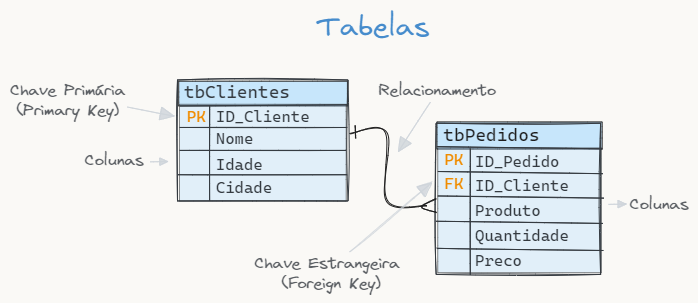

#### Índíce

- [Consultar todos os dados de uma tabela](#secao-1)
- [Selecionando apenas uma coluna](#secao-2)
- [Fechar conexão e apagar Banco de Dados](#apagar)



# SELECT

<h3 style="background-color: #FAF9F6; color: #11557C; text-align: left; font-family: 'Arial', sans-serif; padding: 10px; border-bottom: 1px solid #11557C;">
    <a id='secao-1'></a>Consultar todos os dados de uma tabela  
</h3>

In [3]:
%%sql


SELECT * FROM tbClientes 



 * sqlite:///bancodados.db
Done.


index,ID_Cliente,Nome,Idade,Cidade
0,1,Luiz,30,São Paulo
1,2,Graziela,28,Rio de Janeiro
2,3,Ricardo,35,Salvador
3,4,Mariana,28,São Paulo
4,5,Leonardo,40,Recife
5,6,Beatriz,16,São Paulo


<h3 style="background-color: #FAF9F6; color: #11557C; text-align: left; font-family: 'Arial', sans-serif; padding: 20px; border-bottom: 1px solid #11557C;">
    <a id='secao-2'></a> Consultar os dados de uma coluna da tabela
</h3>

In [4]:
%%sql 


SELECT 
    Nome 
FROM 
    tbClientes



 * sqlite:///bancodados.db
Done.


Nome
Luiz
Graziela
Ricardo
Mariana
Leonardo
Beatriz


<h3 style="background-color: #FAF9F6; color: #11557C; text-align: left; font-family: 'Arial', sans-serif; padding: 20px; border-bottom: 1px solid #11557C;">
    <a id='secao-2'></a> Consultar os dados de mais colunas da tabela
</h3>

In [5]:
%%sql 


SELECT 
    Nome, Idade 
FROM 
    tbClientes 



 * sqlite:///bancodados.db
Done.


Nome,Idade
Luiz,30
Graziela,28
Ricardo,35
Mariana,28
Leonardo,40
Beatriz,16


# WHERE

<h3 style="background-color: #FAF9F6; color: #11557C; text-align: left; font-family: 'Arial', sans-serif; padding: 20px; border-bottom: 1px solid #11557C;">
    <a id='secao-2'></a> Filtrar a pesquisa
</h3>

In [6]:
%%sql 


SELECT 
    ID_Cliente,
    Nome,
    Idade,
    Cidade
FROM 
    tbClientes 
WHERE 
    Idade > 28




 * sqlite:///bancodados.db
Done.


ID_Cliente,Nome,Idade,Cidade
1,Luiz,30,São Paulo
3,Ricardo,35,Salvador
5,Leonardo,40,Recife


In [7]:
%%sql 


SELECT 
    ID_Cliente,
    Nome,
    Idade,
    Cidade
FROM 
    tbClientes 
WHERE 
    Idade > 28
    AND Cidade = "São Paulo"




 * sqlite:///bancodados.db
Done.


ID_Cliente,Nome,Idade,Cidade
1,Luiz,30,São Paulo


---------------
PRIMEIRAS 'N' LINHAS

In [16]:
clientes_df.head(2)

,ID_Cliente,Nome,Idade,Cidade
0,1,Luiz,30,São Paulo
1,2,Graziela,28,Rio de Janeiro


In [17]:
%%sql 

SELECT * FROM tbClientes LIMIT 2

 * sqlite:///bancodados.db
Done.


index,ID_Cliente,Nome,Idade,Cidade
0,1,Luiz,30,São Paulo
1,2,Graziela,28,Rio de Janeiro


---------------
VALORES DISTINTOS

In [18]:
clientes_df["Cidade"].unique()

array(['São Paulo', 'Rio de Janeiro', 'Salvador', 'Recife'], dtype=object)

In [19]:
%%sql 

SELECT DISTINCT Cidade FROM tbClientes 

 * sqlite:///bancodados.db
Done.


Cidade
São Paulo
Rio de Janeiro
Salvador
Recife


---------------
CONTAGEM DE VALORES DISTINTOS

In [20]:
clientes_df["Cidade"].nunique()

4

In [23]:
%%sql 

SELECT COUNT(DISTINCT Cidade) as quantidade FROM tbClientes 

 * sqlite:///bancodados.db
Done.


quantidade
4


----------------
AGRUPAMENTO

In [28]:
clientes_df.groupby('Cidade').size()

Cidade
Recife            1
Rio de Janeiro    1
Salvador          1
São Paulo         3
dtype: int64

In [29]:
%%sql 

SELECT Cidade, COUNT('ID_Clientes') as quantidade FROM tbClientes GROUP BY Cidade

 * sqlite:///bancodados.db
Done.


Cidade,quantidade
Recife,1
Rio de Janeiro,1
Salvador,1
São Paulo,3


---------------
ORDENAÇÃO POR UMA COLUNA

In [30]:
clientes_df.sort_values(by=["Nome"])

,ID_Cliente,Nome,Idade,Cidade
5,6,Beatriz,16,São Paulo
1,2,Graziela,28,Rio de Janeiro
4,5,Leonardo,40,Recife
0,1,Luiz,30,São Paulo
3,4,Mariana,28,São Paulo
2,3,Ricardo,35,Salvador


In [32]:
%%sql 

SELECT Nome, Idade FROM tbClientes ORDER BY Nome

 * sqlite:///bancodados.db
Done.


Nome,Idade
Beatriz,16
Graziela,28
Leonardo,40
Luiz,30
Mariana,28
Ricardo,35


-----------
ORDERNAÇÃO POR VÁRIAS COLUNAS

In [33]:
clientes_df.sort_values(by=["Nome","Cidade"])

,ID_Cliente,Nome,Idade,Cidade
5,6,Beatriz,16,São Paulo
1,2,Graziela,28,Rio de Janeiro
4,5,Leonardo,40,Recife
0,1,Luiz,30,São Paulo
3,4,Mariana,28,São Paulo
2,3,Ricardo,35,Salvador


In [34]:
%%sql 

SELECT Nome, Idade, Cidade FROM tbClientes ORDER BY Nome, Idade

 * sqlite:///bancodados.db
Done.


Nome,Idade,Cidade
Beatriz,16,São Paulo
Graziela,28,Rio de Janeiro
Leonardo,40,Recife
Luiz,30,São Paulo
Mariana,28,São Paulo
Ricardo,35,Salvador


-----
CONTAGEM DE VALORES ÚNICOS

In [35]:
clientes_df["Cidade"].value_counts()

Cidade
São Paulo         3
Rio de Janeiro    1
Salvador          1
Recife            1
Name: count, dtype: int64

In [37]:
%%sql

SELECT Cidade, COUNT('ID_Cliente') as quantidade FROM tbClientes GROUP BY Cidade ORDER BY quantidade DESC

 * sqlite:///bancodados.db
Done.


Cidade,quantidade
São Paulo,3
Salvador,1
Rio de Janeiro,1
Recife,1


-------------
JOINS

In [38]:
# Exibindo o DataFrame de Pedidos
print("\nDataFrame de Pedidos:")
pedidos_df


DataFrame de Pedidos:


,ID_Pedido,ID_Cliente,Produto,Quantidade,Preco
0,101,1,Camisa,2,30.00
1,102,3,Calça,1,35.00
2,103,2,Vestido,3,42.00
3,104,5,Sapato,2,15.50
4,105,4,Blusa,1,9.90
5,106,1,Camisa,2,80.00
6,107,2,Calça,1,12.99
7,108,3,Vestido,3,30.00
8,109,6,Sapato,2,45.25
9,110,1,Blusa,1,5.00


In [39]:
%%sql 

SELECT * FROM tbPedidos 

 * sqlite:///bancodados.db
Done.


index,ID_Pedido,ID_Cliente,Produto,Quantidade,Preco
0,101,1,Camisa,2,30.0
1,102,3,Calça,1,35.0
2,103,2,Vestido,3,42.0
3,104,5,Sapato,2,15.5
4,105,4,Blusa,1,9.9
5,106,1,Camisa,2,80.0
6,107,2,Calça,1,12.99
7,108,3,Vestido,3,30.0
8,109,6,Sapato,2,45.25
9,110,1,Blusa,1,5.0


-------------------
INNER JOIN

In [40]:
df_merge = pd.merge(clientes_df, pedidos_df, on="ID_Cliente", how="inner")
df_merge

,ID_Cliente,Nome,Idade,Cidade,ID_Pedido,Produto,Quantidade,Preco
0,1,Luiz,30,São Paulo,101,Camisa,2,30.00
1,1,Luiz,30,São Paulo,106,Camisa,2,80.00
2,1,Luiz,30,São Paulo,110,Blusa,1,5.00
3,2,Graziela,28,Rio de Janeiro,103,Vestido,3,42.00
4,2,Graziela,28,Rio de Janeiro,107,Calça,1,12.99
5,3,Ricardo,35,Salvador,102,Calça,1,35.00
6,3,Ricardo,35,Salvador,108,Vestido,3,30.00
7,4,Mariana,28,São Paulo,105,Blusa,1,9.90
8,5,Leonardo,40,Recife,104,Sapato,2,15.50
9,6,Beatriz,16,São Paulo,109,Sapato,2,45.25


In [41]:
%%sql 

SELECT 
    tbClientes.ID_Cliente, 
    tbClientes.Nome, 
    tbClientes.Idade, 
    tbClientes.Cidade, 
    tbPedidos.ID_Pedido, 
    tbPedidos.Produto, 
    tbPedidos.Quantidade, 
    tbPedidos.Preco 
FROM tbClientes 
    INNER JOIN tbPedidos ON (tbClientes.ID_Cliente = tbPedidos.ID_Cliente)

 * sqlite:///bancodados.db
Done.


ID_Cliente,Nome,Idade,Cidade,ID_Pedido,Produto,Quantidade,Preco
1,Luiz,30,São Paulo,101,Camisa,2,30.0
1,Luiz,30,São Paulo,106,Camisa,2,80.0
1,Luiz,30,São Paulo,110,Blusa,1,5.0
2,Graziela,28,Rio de Janeiro,103,Vestido,3,42.0
2,Graziela,28,Rio de Janeiro,107,Calça,1,12.99
3,Ricardo,35,Salvador,102,Calça,1,35.0
3,Ricardo,35,Salvador,108,Vestido,3,30.0
4,Mariana,28,São Paulo,105,Blusa,1,9.9
5,Leonardo,40,Recife,104,Sapato,2,15.5
6,Beatriz,16,São Paulo,109,Sapato,2,45.25


----------------
LEFT JOIN

In [42]:
df_merge = pd.merge(clientes_df, pedidos_df, on="ID_Cliente", how="left")
df_merge

,ID_Cliente,Nome,Idade,Cidade,ID_Pedido,Produto,Quantidade,Preco
0,1,Luiz,30,São Paulo,101,Camisa,2,30.00
1,1,Luiz,30,São Paulo,106,Camisa,2,80.00
2,1,Luiz,30,São Paulo,110,Blusa,1,5.00
3,2,Graziela,28,Rio de Janeiro,103,Vestido,3,42.00
4,2,Graziela,28,Rio de Janeiro,107,Calça,1,12.99
5,3,Ricardo,35,Salvador,102,Calça,1,35.00
6,3,Ricardo,35,Salvador,108,Vestido,3,30.00
7,4,Mariana,28,São Paulo,105,Blusa,1,9.90
8,5,Leonardo,40,Recife,104,Sapato,2,15.50
9,6,Beatriz,16,São Paulo,109,Sapato,2,45.25


In [43]:
%%sql 

SELECT 
    tbClientes.ID_Cliente, 
    tbClientes.Nome, 
    tbClientes.Idade, 
    tbClientes.Cidade, 
    tbPedidos.ID_Pedido, 
    tbPedidos.Produto, 
    tbPedidos.Quantidade, 
    tbPedidos.Preco 
FROM tbClientes 
    LEFT JOIN tbPedidos ON (tbClientes.ID_Cliente = tbPedidos.ID_Cliente)

 * sqlite:///bancodados.db
Done.


ID_Cliente,Nome,Idade,Cidade,ID_Pedido,Produto,Quantidade,Preco
1,Luiz,30,São Paulo,101,Camisa,2,30.0
1,Luiz,30,São Paulo,106,Camisa,2,80.0
1,Luiz,30,São Paulo,110,Blusa,1,5.0
2,Graziela,28,Rio de Janeiro,103,Vestido,3,42.0
2,Graziela,28,Rio de Janeiro,107,Calça,1,12.99
3,Ricardo,35,Salvador,102,Calça,1,35.0
3,Ricardo,35,Salvador,108,Vestido,3,30.0
4,Mariana,28,São Paulo,105,Blusa,1,9.9
5,Leonardo,40,Recife,104,Sapato,2,15.5
6,Beatriz,16,São Paulo,109,Sapato,2,45.25


------------
WINDOWS FUNCTIONS

In [44]:
pedidos_df["MediaPreco"] = pedidos_df.groupby("Produto")["Preco"].transform("mean")
pedidos_df

,ID_Pedido,ID_Cliente,Produto,Quantidade,Preco,MediaPreco
0,101,1,Camisa,2,30.00,55.000
1,102,3,Calça,1,35.00,23.995
2,103,2,Vestido,3,42.00,36.000
3,104,5,Sapato,2,15.50,30.375
4,105,4,Blusa,1,9.90,7.450
5,106,1,Camisa,2,80.00,55.000
6,107,2,Calça,1,12.99,23.995
7,108,3,Vestido,3,30.00,36.000
8,109,6,Sapato,2,45.25,30.375
9,110,1,Blusa,1,5.00,7.450


In [45]:
%%sql


SELECT 
    ID_Pedido,
    Produto,
    Preco,
    AVG(Preco) OVER (PARTITION BY Produto) AS avg_salary_per_department
FROM 
    tbPedidos
ORDER BY
    ID_Pedido

 * sqlite:///bancodados.db
Done.


ID_Pedido,Produto,Preco,avg_salary_per_department
101,Camisa,30.0,55.0
102,Calça,35.0,23.995
103,Vestido,42.0,36.0
104,Sapato,15.5,30.375
105,Blusa,9.9,7.45
106,Camisa,80.0,55.0
107,Calça,12.99,23.995
108,Vestido,30.0,36.0
109,Sapato,45.25,30.375
110,Blusa,5.0,7.45


<a id='apagar'>apagar</a>

In [7]:
try:
    # Fecha a conexão com o banco de dados e apaga o banco de dados
    if os.path.exists('bancodados.db'):     
        conexao.close()  
        os.remove('bancodados.db')
        print("Banco de dados 'bancodados.db' apagado com sucesso.")
    else:
        print("O banco de dados 'bancodados.db' não existe.")
except:
    print("Acesso Negado: Não foi possível realizar a exclusão do bando de dados.")

Acesso Negado: Não foi possível realizar a exclusão do bando de dados.
